# What Is Naive Bayes?

A Naive Bayes Classifier is a supervised machine-learning algorithm that uses the Bayes’ Theorem, which assumes that features are statistically independent. The theorem relies on the naive assumption that input variables are independent of each other.

Naive Bayes is a classification algorithm for binary (two-class) and multi-class classification problems. The technique is easiest to understand when described using binary or categorical input values.

It is mainly used in text classification that includes a high-dimensional training dataset.

![Naive Bayes](1.jpeg)

**Note** :learn more about <a href='https://en.m.wikipedia.org/wiki/Bayes%27_theorem'>Bayes Theorm</a>

## Naive Bayes Application:
* Face Recognition
* Weather Prediction
* Medical Diagnosis
* News Classification

## Naive Bayes Advantages:
* Easy To implement.
* Fast to tain and classify.
* Not sensitive to irrelevant features.
* Handles Missing Values.
* Good at Handelling streaming Data

### Implementation : Text Classification

#### Use Case :
Use naive bayes to perform text classification of news headlines into topics:

#### Importing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

In [2]:
# Loading Data
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [3]:
# Defining all Categories
categories = ['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

#### Training the data on categories

In [4]:
train = fetch_20newsgroups(subset='train', categories=categories)

#### Test the data

In [5]:
test = fetch_20newsgroups(subset='test', categories=categories)

In [7]:
print(train.data[1])
#print the training data 

From: guykuo@carson.u.washington.edu (Guy Kuo)
Subject: SI Clock Poll - Final Call
Summary: Final call for SI clock reports
Keywords: SI,acceleration,clock,upgrade
Article-I.D.: shelley.1qvfo9INNc3s
Organization: University of Washington
Lines: 11
NNTP-Posting-Host: carson.u.washington.edu

A fair number of brave souls who upgraded their SI clock oscillator have
shared their experiences for this poll. Please send a brief message detailing
your experiences with the procedure. Top speed attained, CPU rated speed,
add on cards and adapters, heat sinks, hour of usage per day, floppy disk
functionality with 800 and 1.4 m floppies are especially requested.

I will be summarizing in the next two days, so please add to the network
knowledge base if you have done the clock upgrade and haven't answered this
poll. Thanks.

Guy Kuo <guykuo@u.washington.edu>



## Now we dive into the actual predictions using naive bayes

In [8]:
# Importing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

## Creating our Model

In [9]:
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

## Train our model on training data

In [10]:
model.fit(train.data, train.target)

Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('multinomialnb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

## Create labels for the test data

In [11]:
labels = model.predict(test.data)

## Create confusion matrix and heat map

Text(89.133125, 0.5, 'Predict Label')

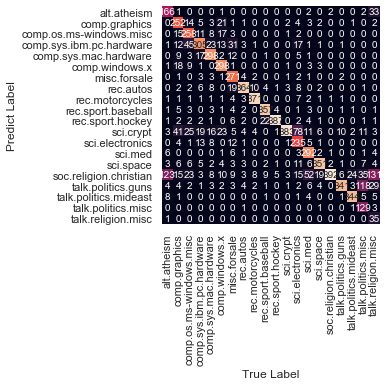

In [14]:
from sklearn.metrics import confusion_matrix
m = confusion_matrix(test.target, labels)
sns.heatmap(m.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('True Label')
plt.ylabel('Predict Label')

## Predict New data Category

In [15]:
def predict_category(s, train=train, model=model):
    p = model.predict([s])
    return train.target_names[p[0]]

In [21]:
predict_category('Real Madrid is the best team in the world!')

'rec.sport.hockey'